# Dataset Analysis Workflow

Today, we're going to walk through the entire workflow of analyzing a dataset.

The steps of conducting a statistical study, overall, are:

1. Writing your hypothesis and planning your research design (already done for us in these cases).
2. Collecting data from samples (already done for us in these cases).
3. Summarize and clean data as needed:
    1. Visualize existing data
    2. Check descriptive statistics
    3. Remove obvious, explainable outliers if needed
4. Make estimates using inferential statistics (building regression models)
5. Interpreting and describing results in terms of the hypothesis and statistics.

Let's give this workflow a try on `../datasets_ml/GECAD_renewable_energy_lab _Wind_power_data.xlsx`, where we want to find out if there is a correlation between the month, time of day, and wind speed with the amount of power generated by a wind turbine:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df_wind = pd.read_excel(
    "../datasets_ml/GECAD_renewable_energy_lab _Wind_power_data.xlsx",
    sheet_name="Wind speed and Power")

In [4]:
df_wind.head()

,Year,Month,Day,Hour,Minute,Wind speed (m/s),Power (W)
0,2011,1,1,0,0,5.26,103.349282
1,2011,1,1,0,10,5.50,114.832536
2,2011,1,1,0,20,4.76,79.425837
3,2011,1,1,0,30,4.94,88.038278
4,2011,1,1,0,40,4.42,63.157895


In [5]:
df_wind.describe()

,Year,Month,Day,Hour,Minute,Wind speed (m/s),Power (W)
count,50364.0,50364.000000,50364.000000,50364.000000,50364.000000,50364.000000,50364.000000
mean,2011.0,6.258756,15.403145,11.493567,25.000000,9.498658,390.383520
std,0.0,3.316801,8.798384,6.920393,17.078421,6.098941,398.295788
min,2011.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.0,3.000000,8.000000,5.000000,10.000000,4.770000,65.550239
50%,2011.0,6.000000,15.000000,11.000000,25.000000,8.270000,227.751196
75%,2011.0,9.000000,23.000000,17.000000,40.000000,12.960000,1000.000000
max,2011.0,12.000000,31.000000,23.000000,50.000000,41.380000,1000.000000


1. It's good to see that our sensor is behaving properly on the low end (min. wind speed == 0 and min. power == 0).
2. Power seems to saturate at 1000 W; we don't know if this is the generator saturating or the sensor saturating.

In [6]:
df_wind.drop(columns="Year", inplace=True)

In [7]:
df_wind.head()

,Month,Day,Hour,Minute,Wind speed (m/s),Power (W)
0,1,1,0,0,5.26,103.349282
1,1,1,0,10,5.50,114.832536
2,1,1,0,20,4.76,79.425837
3,1,1,0,30,4.94,88.038278
4,1,1,0,40,4.42,63.157895


In [8]:
df_wind["Time (s)"] = ((df_wind["Month"] - 1) * 2628000 + 
                       (df_wind["Day"] - 1) * 86400 + 
                       df_wind["Hour"] * 3600 + 
                       df_wind["Minute"] * 60)

In [9]:
df_wind.head()

,Month,Day,Hour,Minute,Wind speed (m/s),Power (W),Time (s)
0,1,1,0,0,5.26,103.349282,0
1,1,1,0,10,5.50,114.832536,600
2,1,1,0,20,4.76,79.425837,1200
3,1,1,0,30,4.94,88.038278,1800
4,1,1,0,40,4.42,63.157895,2400


<AxesSubplot:xlabel='Time (s)', ylabel='Power (W)'>

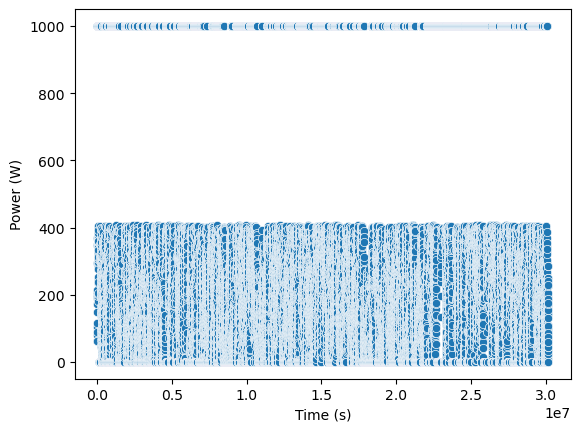

In [10]:
sns.scatterplot(data=df_wind,
                x="Time (s)",
                y="Power (W)")

FIXME: What in the world happened to about 600 W of power?!

Maybe we have to take out some of those 1000 W readings, it might literally be a sensor issue.

In [13]:
df_problematic = df_wind[df_wind["Power (W)"] > 500]
df_problematic.describe()

,Month,Day,Hour,Minute,Wind speed (m/s),Power (W),Time (s)
count,14279.000000,14279.000000,14279.00000,14279.000000,14279.000000,14279.0,1.427900e+04
mean,6.860494,15.038588,11.78829,24.908607,15.955177,1000.0,1.665825e+07
std,3.522884,8.744132,6.68410,17.052886,3.195781,0.0,9.239683e+06
min,1.000000,1.000000,0.00000,0.000000,11.600000,1000.0,7.200000e+03
25%,3.000000,7.000000,6.00000,10.000000,13.230000,1000.0,7.053300e+06
50%,7.000000,15.000000,12.00000,20.000000,15.350000,1000.0,1.833300e+07
75%,10.000000,22.000000,17.00000,40.000000,18.150000,1000.0,2.490870e+07
max,12.000000,31.000000,23.00000,50.000000,24.000000,1000.0,3.013020e+07


In [14]:
df_probably_okay = df_wind[df_wind["Power (W)"] <= 500]
df_probably_okay.describe()

,Month,Day,Hour,Minute,Wind speed (m/s),Power (W),Time (s)
count,36085.000000,36085.000000,36085.000000,36085.000000,36085.000000,36085.000000,3.608500e+04
mean,6.020646,15.547402,11.376943,25.036165,6.943784,149.155483,1.449361e+07
std,3.200587,8.815718,7.008366,17.088615,4.985155,127.131527,8.401452e+06
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,3.000000,8.000000,5.000000,10.000000,3.930000,22.966507,7.634400e+06
50%,6.000000,15.000000,11.000000,30.000000,6.180000,130.143541,1.427520e+07
75%,8.000000,23.000000,18.000000,40.000000,8.840000,255.023923,2.095500e+07
max,12.000000,31.000000,23.000000,50.000000,41.380000,406.220096,3.018180e+07


<AxesSubplot:xlabel='Wind speed (m/s)', ylabel='Power (W)'>

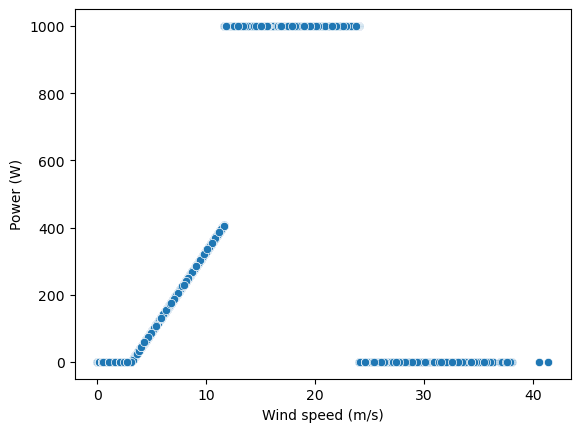

In [15]:
sns.scatterplot(data=df_wind,
                x="Wind speed (m/s)",
                y="Power (W)")

In [21]:
df_wind_good = df_wind[(df_wind["Wind speed (m/s)"] < 11.6) & (df_wind["Power (W)"] > 0)].copy()
df_wind_good.dropna(inplace=True)
df_wind_good.describe()

,Month,Day,Hour,Minute,Wind speed (m/s),Power (W),Time (s)
count,28721.000000,28721.000000,28721.000000,28721.000000,28721.000000,28721.000000,2.872100e+04
mean,6.066014,15.323979,11.329654,25.040563,7.016631,187.398614,1.459337e+07
std,3.205794,8.774683,6.904252,17.086925,2.395729,114.628180,8.391555e+06
min,1.000000,1.000000,0.000000,0.000000,3.110000,0.478469,0.000000e+00
25%,3.000000,8.000000,5.000000,10.000000,4.900000,86.124402,7.846800e+06
50%,6.000000,15.000000,11.000000,30.000000,6.830000,178.468900,1.435140e+07
75%,8.000000,23.000000,17.000000,40.000000,9.020000,283.253589,2.092020e+07
max,12.000000,31.000000,23.000000,50.000000,11.590000,406.220096,3.018180e+07


<AxesSubplot:xlabel='Wind speed (m/s)', ylabel='Power (W)'>

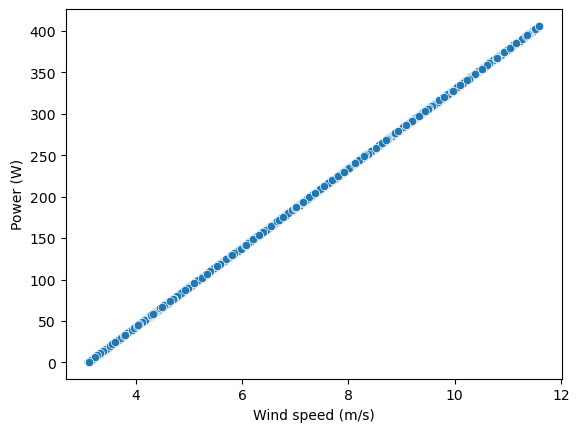

In [22]:
sns.scatterplot(data=df_wind_good, x="Wind speed (m/s)", y="Power (W)")

In [29]:
df_wind_good_renamed = df_wind_good.rename(
    columns={
        "Wind speed (m/s)": "Wind_speed_mps",
        "Power (W)": "Power_W",
        "Time (s)": "Time_s"
    })
df_wind_good_renamed.head()

,Month,Day,Hour,Minute,Wind_speed_mps,Power_W,Time_s
0,1,1,0,0,5.26,103.349282,0
1,1,1,0,10,5.50,114.832536,600
2,1,1,0,20,4.76,79.425837,1200
3,1,1,0,30,4.94,88.038278,1800
4,1,1,0,40,4.42,63.157895,2400


In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [32]:
f_model_wind_good = smf.ols(
    formula="Power_W ~ Wind_speed_mps + Time_s + 1",
    data=df_wind_good_renamed)
f_model_wind_good_results = f_model_wind_good.fit()
f_model_wind_good_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Power_W   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.191e+22
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:43:34   Log-Likelihood:             4.1557e+05
No. Observations:               28721   AIC:                        -8.311e+05
Df Residuals:                   28718   BIC:                        -8.311e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -148.3254   2.57e-09  -5.76e+10      0.000    -148.325    -148.325
Wind_speed_mps    47.8469   3.11e-10   1.54e+11      0.000      47.847      47.847
Time_s         -8.482e-16   8.87e-17     -9.565      0.000   -1.02e-15   -6.74e-16
==============================================================================
Omnibus:                     6368.877   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1226.008
Skew:                           0.100   Prob(JB):                    5.97e-267
Kurtosis:                       2.008   Cond. No.                     5.86e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

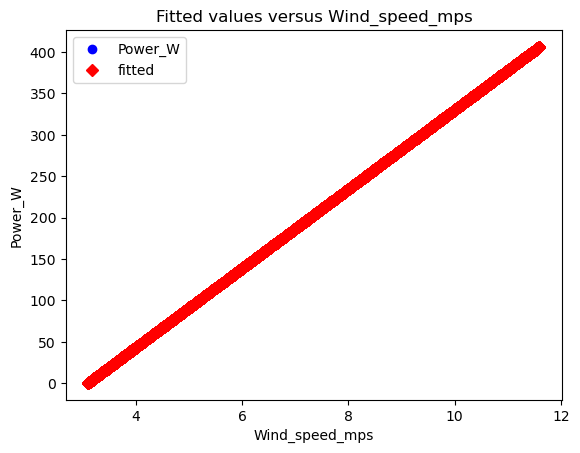

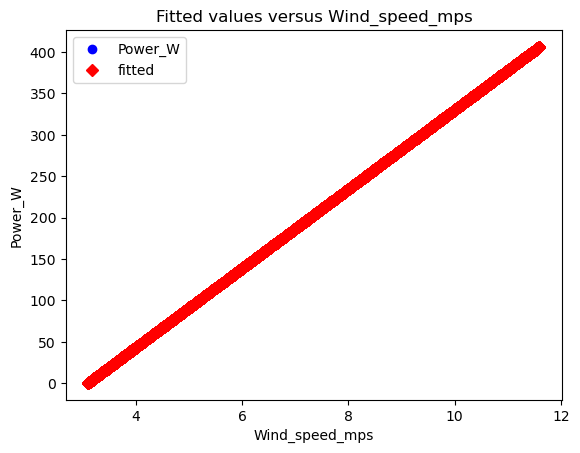

In [31]:
sm.graphics.plot_fit(f_model_wind_good_results, "Wind_speed_mps")

## Rehash, but in `statsmodels` documentation

See: https://www.statsmodels.org/dev/examples/notebooks/generated/chi2_fitting.html

## Example ECE-focused public datasets

- https://site.ieee.org/pes-iss/data-sets/
- https://pureportal.strath.ac.uk/en/organisations/electronic-and-electrical-engineering/datasets/
- https://www.iea.org/data-and-statistics/data-sets?filter=renewables
- https://www.iea.org/data-and-statistics/data-sets/?filter=electricity
- https://datasetsearch.research.google.com/

Let's give this workflow another try on `../datasets_as/fat.csv`, where those specializing in biomedical engineering are trying to build a consistent way to measure bodyfat percentage: